### This tutorial shows how to get the data into dataloaders from deeplake and makes basic data overview.

To see how to do it with dowloading data and working locally - check make_model tutorial or [last year repo](https://github.com/sinzlab/sensorium/blob/main/notebooks/dataset_tutorial/1_inspect_data.ipynb)

In [1]:
## TODO - uncomment for colab setup

# !git clone https://github.com/ecker-lab/sensorium_2023
# !pip install git+https://github.com/sinzlab/nnfabrik.git
# !pip install git+https://github.com/sinzlab/neuralpredictors
# !pip install pyarrow
# !pip install wandb
# !pip install GitPython
# !pip install datajoint
# !pip install deeplake
# !pip install parquet
# import sys
# sys.path.append('/content/sensorium_2023')

In [44]:
import torch

torch.__config__.show()

'PyTorch built with:\n  - C++ Version: 199711\n  - MSVC 193431937\n  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)\n  - OpenMP 2019\n  - LAPACK is enabled (usually provided by MKL)\n  - CPU capability usage: AVX2\n  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=C:/actions-runner/_work/pytorch/pytorch/builder/windows/tmp_bin/sccache-cl.exe, CXX_FLAGS=/DWIN32 /D_WINDOWS /GR /EHsc /w /bigobj /FS -DUSE_PTHREADPOOL -DNDEBUG -DUSE_KINETO -DLIBKINETO_NOCUPTI -DLIBKINETO_NOROCTRACER -DUSE_FBGEMM -DUSE_XNNPACK -DSYMBOLICATE_MOBILE_DEBUG_HANDLE, LAPACK_INFO=mkl, PERF_WITH_AVX=1, PERF_WITH_AVX2=1, PERF_WITH_AVX512=1, TORCH_DISABLE_GPU_ASSERTS=OFF, TORCH_VERSION=2.0.1, USE_CUDA=0, USE_CUDNN=OFF, USE_EXCEPTION_PTR=1, USE_GFLAGS=OFF, USE_GLOG=OFF, USE_MKL=ON, USE_MKLDNN=ON, USE_MPI=OFF, USE_NCCL=OFF, USE_NNPACK=OFF, USE_OPENMP=ON, USE

In [1]:
import deeplake
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from IPython.display import HTML
from matplotlib import animation
import imageio
import os
import numpy as np
import plotly.express as px
from functools import partial

from torchvision.transforms import Compose

# from torchvision.transforms import ToTensor

mice = [
    'dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce',
]

import os
import pickle

REFRESH_DATASETS = False

for mouseIndex in range(5):
    fileName = "mouse%s.pkl" % mouseIndex
    if not REFRESH_DATASETS and fileName in os.listdir():
        continue
    fileHandler = open(fileName, "wb")
    dataset = deeplake.load(f'hub://sinzlab/Sensorium_2023_{mice[mouseIndex]}_train')
    pickle.dump(dataset, fileHandler)
    fileHandler.close()

## Load single dataset and visualize a video

In [2]:
MOUSE_INDEX = 0

fileHandler = open("mouse%s.pkl" % MOUSE_INDEX, "rb")
mouseDataset = pickle.load(fileHandler)
fileHandler.close()

mouseDataset.summary()

# behavior (n, , t)
# id (n, )
# pupil_center (n, , t)
# responses (n, x, t)
# videos (n, , t, h, w)

Dataset(path='hub://sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_train', read_only=True, tensors=['behavior', 'id', 'pupil_center', 'responses', 'videos'])

    tensor      htype           shape           dtype  compression
   -------     -------         -------         -------  ------- 
   behavior    generic      (350, 3, 299)      float32   None   
      id        text          (350, 1)           str     None   
 pupil_center  generic      (350, 2, 299)      float32   None   
  responses    generic    (350, 7440, 299)     float32   None   
    videos     generic  (350, 3, 299, 36, 64)  float32   None   


In [130]:
# pupilSize = mouseDataset["behavior"][:, 0, :].numpy()
# changeOfPupilSize = mouseDataset["behavior"][:, 1, :].numpy()
# locomotionSpeed = mouseDataset["behavior"][:, 2, :].numpy()

# isEqual = True
# for row in (pupilSize == changeOfPupilSize):
#     if False in row:
#         isEqual = False
#         break
# print(isEqual)

# horizontalEyePosition = mouseDataset["pupil_center"][:, 0, :].numpy()
# verticalEyePosition = mouseDataset["pupil_center"][:, 1, :].numpy()

# actualVideos = mouseDataset["videos"][:, 0, :, :, :].numpy()
# addedPupilSize = mouseDataset["videos"][:, 1, :, :, :].numpy()
# addedLocomotionSpeed = mouseDataset["videos"][:, 2, :, :, :].numpy()

True


KeyboardInterrupt: 

In [113]:
VIDEO_INDEX = 0

NEURON_START = 0
NEURON_STOP = 299
FRAME_START = 0
FRAME_STOP = 299

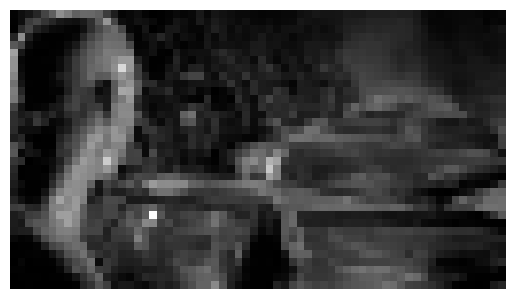

In [93]:
vid = mouseDataset.videos[VIDEO_INDEX].numpy()

%matplotlib inline
# an equal aspect (square), and turn the axes off
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_axis_off()

# Images are generated and stored in a list to animate later
images_vid = []
images_as_array = []
for image in vid[0,:,:,:]:
    # Scatter plot each point using a dot of size 250 and color red
    #images_vid.append([ax.imshow(image,cmap='gray')])
    images_vid.append([ax.imshow(image, cmap='gray')])
    images_as_array.append(image)
# The animation can now be created using ArtistAnimation
anim = animation.ArtistAnimation(fig,
                                images_vid,
                                interval= 1000 / 30,
                                blit=True,
                                repeat=False
                                )
HTML(anim.to_jshtml())

In [111]:
vid[2, :, :, :]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Plot reponses and behaviour

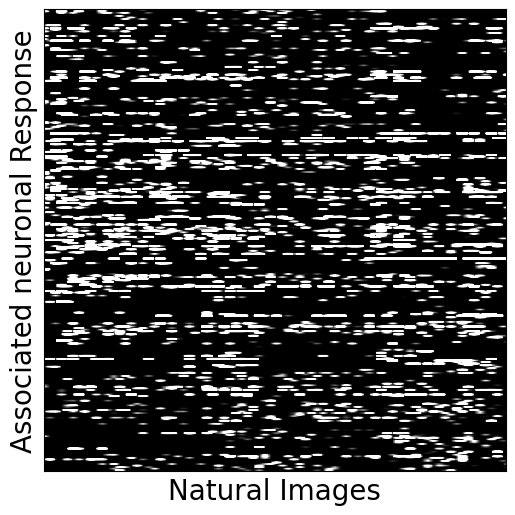

In [114]:
responses = mouseDataset.responses[VIDEO_INDEX].numpy()

_,  ax = plt.subplots(1,1, figsize=(6,6))

ax.imshow(responses[NEURON_START:NEURON_STOP, FRAME_START:FRAME_STOP], cmap="gray",vmin=0, vmax=5)

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel("Natural Images", fontsize=20, )
ax.set_ylabel("Associated neuronal Response", fontsize=20, );

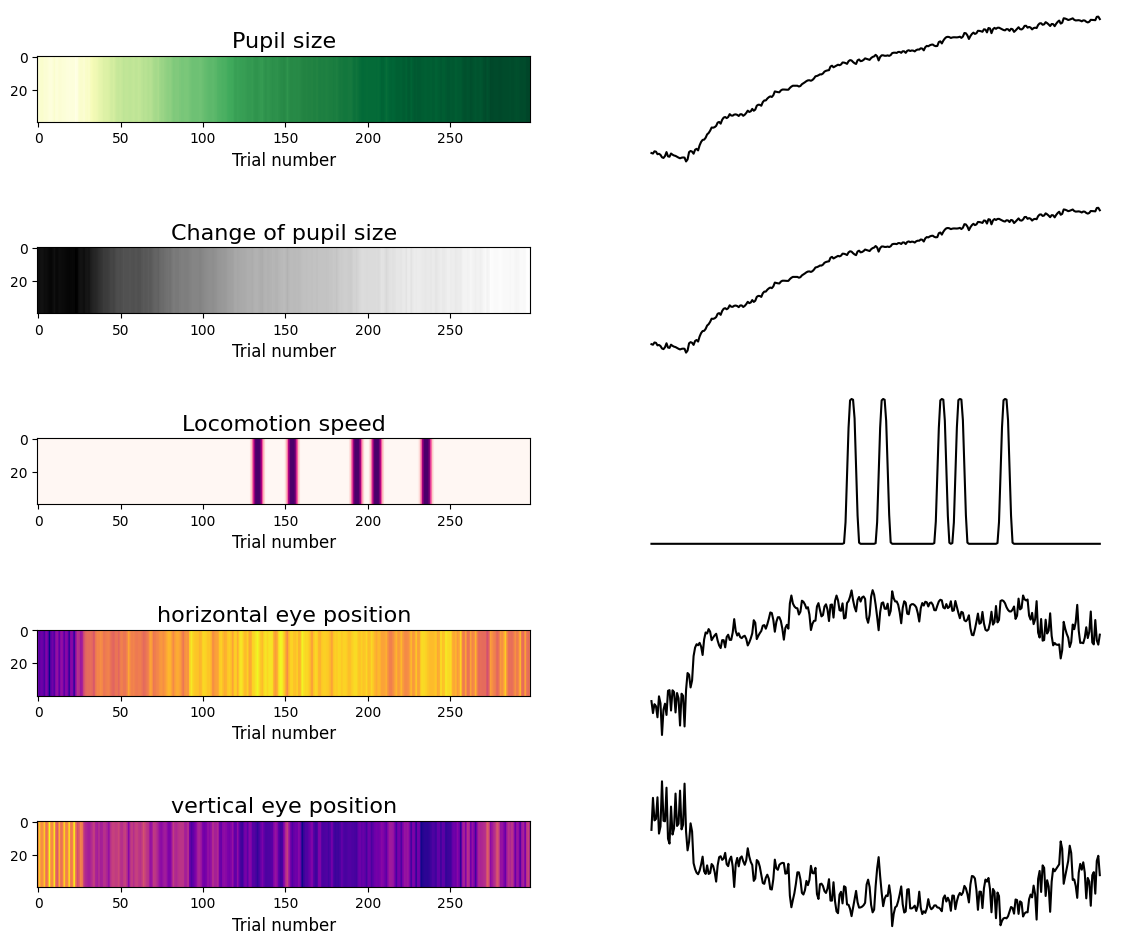

In [115]:
BEHAVIORS = ["Pupil size", 
            "Change of pupil size", 
            "Locomotion speed",
            "horizontal eye position",
            "vertical eye position"]
COLORMAPS = ["YlGn", "gray", "RdPu", "plasma", "plasma"]

LEFT = 0
RIGHT = 1

BAR_PLOT_HEIGHT = 40

behaviors = mouseDataset.behavior[VIDEO_INDEX].numpy()
eye_positions = mouseDataset.pupil_center[VIDEO_INDEX].numpy()
all_behaviors = np.vstack([behaviors, eye_positions, ])

_, axs = plt.subplots(5,2, figsize=(14,12))

for behaviorIndex in range(len(BEHAVIORS)):
    axs[behaviorIndex, LEFT].set_title(BEHAVIORS[behaviorIndex], fontsize=16)
    axs[behaviorIndex, LEFT].imshow(np.tile(all_behaviors[behaviorIndex, :FRAME_STOP], (BAR_PLOT_HEIGHT, 1)), cmap=COLORMAPS[behaviorIndex])
    axs[behaviorIndex, LEFT].set_xlabel("Trial number", fontsize=12)
    
for behaviorIndex in range(len(BEHAVIORS)):
    axs[behaviorIndex, RIGHT].plot(all_behaviors[behaviorIndex, :FRAME_STOP], 'k-')
    axs[behaviorIndex, RIGHT].axis("off")

In [15]:
# all_behaviors.shape

## Get neurons 3D coordinates

In [4]:
cell_motor_coordinates = mouseDataset.info['cell_motor_coordinates']

In [28]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

In [34]:
c1 = '#1f77b4' #blue
c2 = 'green' #green
neuronSampleCount = 200

colors = []
for x in range(neuronSampleCount):
    colors.append(colorFader(c1, c2, x/n))

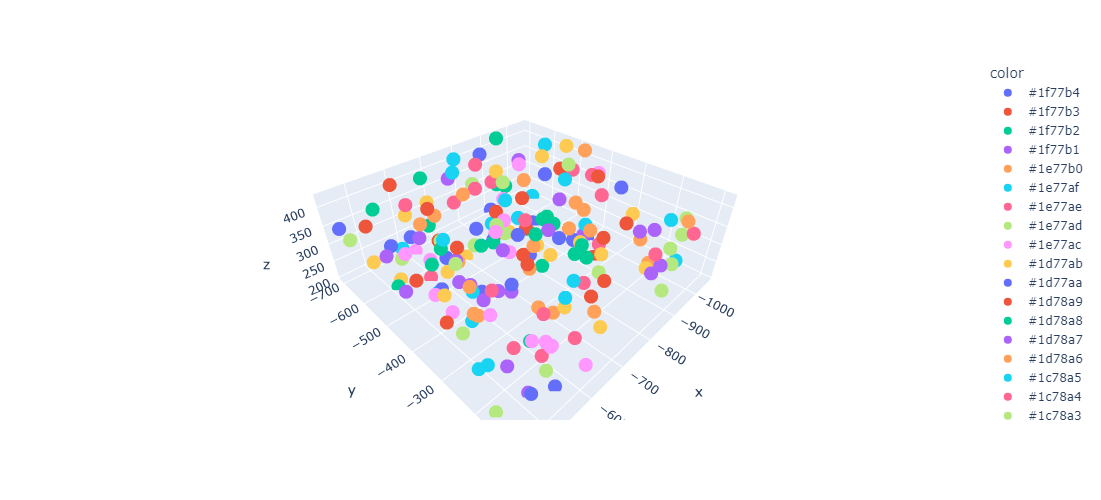

In [35]:
NEURON_TOTAL_COUNT = cell_motor_coordinates.shape[0]

neuron_subset = cell_motor_coordinates[
    np.random.choice(NEURON_TOTAL_COUNT, 
                     neuronSampleCount, 
                     replace=False)
]

fig = px.scatter_3d(x=neuron_subset[:, 0], 
                    y=neuron_subset[:, 1], 
                    z=neuron_subset[:, 2],
                   color=colors)

fig.layout.height = 500
fig.show()

## Add augmentations for dataloaders

In [36]:
def neuro_normalise(
    data, dataset_statistic, inputs_mean=None, inputs_std=None, with_responses=True
):
    '''
    adopted from neuropredictors NeuroNormalizer
    https://github.com/sinzlab/neuralpredictors/blob/main/neuralpredictors/data/transforms.py#L309

    - inputs are scaled by the training std of the stats_source and centered on the mean of the movie
    - behavior is divided by the std if the std is greater than 1% of the mean std (to avoid division by 0)
    - eye_position is z-scored
    - reponses are divided by the per neuron std if the std is greater than
            1% of the mean std (to avoid division by 0)

    '''
    data_len = data['videos'].shape[1]
    inputs_mean = inputs_mean if inputs_mean else dataset_statistic['videos']['mean'][:, :, :data_len].transpose(2, 0, 1)
    inputs_std  = inputs_std if inputs_std else dataset_statistic['videos']['std'][:, :, :data_len].transpose(2, 0, 1)
    # -- inputs in deeplake are already stacked with behaviour in different channels, 
    # so we normalise only the first channel
    data['videos'][0, :, :] = (data['videos'][0, :, :] - inputs_mean) / inputs_std
    
    if with_responses:
    
        s = np.array(dataset_statistic['responses']['std'])[:, :data_len]
        threshold = 0.01 * s.mean()
        idx = s > threshold
        response_precision = np.ones_like(s) / threshold
        response_precision[idx] = 1 / s[idx]
        data['responses'] = data['responses'] * response_precision

    eye_mean = np.array(dataset_statistic['pupil_center']['mean'])[:, :data_len]
    eye_std = np.array(dataset_statistic['pupil_center']['std'])[:, :data_len]
    data['pupil_center'] = (data['pupil_center'] - eye_mean) / eye_std
    
    return data

In [37]:
def transform(sample_in, dataset_statistic, frames=150, offset=-1, with_responses=True):
    '''
    As in our dataset videos are not of the same length, 
    to stack them in a batch we are going to subsample 'frames' frames randomly during loading data
    and also normalise things (before subsampling)
    
    NOTE that the amount of frames should be bigger then 50 
    otherwise, the assertion test would fail duringcomputing metric 
    as we delete first 50 frames of responses 
    (and the additional predictions if any)
    '''
    sample_in = neuro_normalise(sample_in, dataset_statistic, with_responses=with_responses)
    
    
    t = sample_in['behavior'].shape[-1]
    if offset < 0:
        i = np.random.randint(0, t - frames)
    
    sample_in['videos'] = sample_in['videos'][:, i : i + frames, :, :]
    sample_in['responses'] = sample_in['responses'][:, i : i + frames]
    sample_in['behavior'] = sample_in['behavior'][:, i : i + frames]
    sample_in['pupil_center'] = sample_in['pupil_center'][:, i : i + frames]
    return sample_in

In [40]:
dataloader = mouseDataset.pytorch(tensors=('videos', 'responses', 
                                      'behavior', 'pupil_center', 'id'), 
                        num_workers=0, 
                        batch_size=16, 
                        transform=partial(transform, dataset_statistic=mouseDataset.info.statistics),
                        shuffle=True)

In [41]:
batch = next(iter(dataloader))

In [42]:
batch['videos'].shape, batch['responses'].shape, batch['behavior'].shape, batch['pupil_center'].shape

(torch.Size([16, 3, 150, 36, 64]),
 torch.Size([16, 7440, 150]),
 torch.Size([16, 3, 150]),
 torch.Size([16, 2, 150]))

In [43]:
batch['id'][:5]

['458', '54', '319', '398', '714']

## Make the dataloaders according to the standard procedure we use for training

In [45]:
dataloaders = {}

rename_dict = {
    'train' : 'train',
    'val' : 'oracle',
}

for div in ['train', 'val']:
    dataloaders[rename_dict[div]] = {}
    for m in mice:
        dataset = deeplake.load(f'hub://sinzlab/Sensorium_2023_{m}_{div}')
        dataloaders[rename_dict[div]] = dataloader = dataset.pytorch(tensors=('videos', 'responses', 
                                      'behavior', 'pupil_center', 'id'), 
                        num_workers=0, 
                        batch_size=16, 
                        transform=partial(transform, 
                                          dataset_statistic=dataset.info.statistics, 
                                          with_responses=True),
                        shuffle=True)
        
        
for div in ['live_test_main', 'live_test_bonus', 'final_test_main', 'final_test_bonus']:
    dataloaders[div] = {}
    for m in mice:
        dataset = deeplake.load(f'hub://sinzlab/Sensorium_2023_{m}_{div}')
        dataloaders[div][m] = dataloader = dataset.pytorch(tensors=('videos', 
                                      'behavior', 'pupil_center', 'id'), 
                        num_workers=0, 
                        batch_size=16, 
                        transform=partial(neuro_normalise, 
                                          dataset_statistic=dataset.info.statistics,
                                          with_responses=False),
                        shuffle=True)

|

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_train



-

hub://sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_train loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_train



-

hub://sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_train loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_train



hub://sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_train loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_train



|

hub://sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_train loaded successfully.



\

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_train



|

hub://sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_train loaded successfully.



\

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_val



hub://sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_val loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_val



\

hub://sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_val loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_val



|

hub://sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_val loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_val



|

hub://sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_val loaded successfully.



\

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_val



\

hub://sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_val loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main



hub://sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main



/

hub://sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main



|

hub://sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main



-

hub://sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main



/

hub://sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_main loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus



|

hub://sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus



\

hub://sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus



-

hub://sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus



-

hub://sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus loaded successfully.



 \

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus



-

hub://sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_live_test_bonus loaded successfully.



\

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main



-

hub://sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main loaded successfully.



\

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main



\

hub://sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main



hub://sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main



/

hub://sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main loaded successfully.



\

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main



|

hub://sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_main loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus



|

hub://sinzlab/Sensorium_2023_dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus



hub://sinzlab/Sensorium_2023_dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus



\

hub://sinzlab/Sensorium_2023_dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus loaded successfully.



/

Opening dataset in read-only mode as you don't have write permissions.


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus



/

hub://sinzlab/Sensorium_2023_dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus



/

hub://sinzlab/Sensorium_2023_dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce_final_test_bonus loaded successfully.



In [46]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x24ce311f190>,
 'oracle': <torch.utils.data.dataloader.DataLoader at 0x24c8becc050>,
 'live_test_main': {'dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce': <torch.utils.data.dataloader.DataLoader at 0x24cdef81910>,
  'dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce': <torch.utils.data.dataloader.DataLoader at 0x24c8948d190>,
  'dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce': <torch.utils.data.dataloader.DataLoader at 0x24ce3be2890>,
  'dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce': <torch.utils.data.dataloader.DataLoader at 0x24c95809590>,
  'dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce': <torch.utils.data.dataloader.DataLoader at 0x24c8ce3ffd0>},
 'live_test_bonus': {'dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce': <torch.utils.data.dataloader.DataLoader at 0x24cdedb78d0>,
  'dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce': <torch.utils.data.dataloader.DataLoa